In [16]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from  datetime import date
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
data = files.upload()

Saving Credit risk analysis Morgan.csv to Credit risk analysis Morgan (1).csv


# **Import dataset**

In [17]:
df = pd.read_csv('Credit risk analysis Morgan.csv')
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [9]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [10]:
df.dtypes

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [5]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [11]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [21]:
feature = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score', 'default' ]

In [13]:
# Calculate the payment_to_income ratio
df['payment_to_icome'] = df['loan_amt_outstanding'] / df['income']

In [19]:
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']

In [22]:
clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[feature], df['default'])
print(clf.coef_, clf.intercept_)

[[ 1.73700692e-05  8.51257577e-04  1.70039703e-03 -3.88217916e-04
  -4.49583425e-05 -1.76323278e-03  3.67499712e-05]] [4.83690422e-07]


In [23]:
y_pred = clf.predict(df[feature])

In [24]:
fpr, tpr, threholds = metrics.roc_curve(df['default'], y_pred)

In [25]:
print((1.0*(abs(df['default']-y_pred))  .sum()) / len(df))
print(metrics.auc(fpr, tpr))

0.017
0.9689013357974341


(array([8149.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1851.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

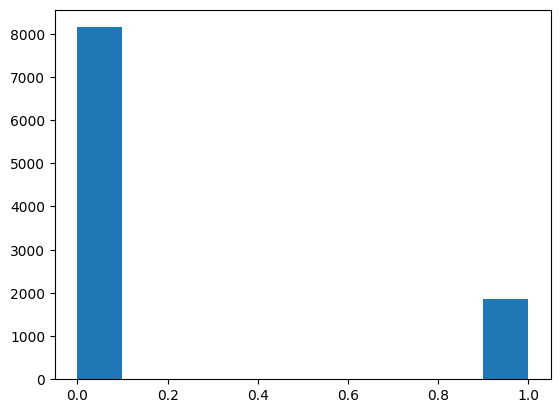

In [27]:
plt.hist(df['default'])

(array([  12.,  117.,  439., 1323., 2458., 2878., 1856.,  732.,  161.,
          24.]),
 array([408. , 452.2, 496.4, 540.6, 584.8, 629. , 673.2, 717.4, 761.6,
        805.8, 850. ]),
 <BarContainer object of 10 artists>)

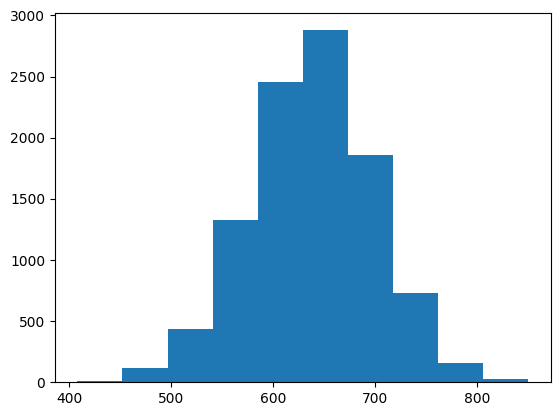

In [29]:
plt.hist(df['fico_score'])